In [72]:
import geopandas as gpd
import pydeck as pdk
import numpy as np
import pandas as pd
import datetime
from datetime import datetime

In [8]:
#한글 폰트 사용
from matplotlib import font_manager,rc
import matplotlib
import matplotlib.pyplot as plt

#폰트 경로
font_path = "C:/Windows/Fonts/H2GTRM.TTF"

#폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()

#font 설정
matplotlib.rc('font',family=font_name)

### 전체

In [24]:
aed = pd.read_csv(r"C:\Users\USER\Desktop\데사페\AED동대문구.csv", encoding='utf-8')

In [26]:
aed_loc = aed.loc[:,('위도', '경도')]
aed_loc.rename(columns = {'위도':'lat', '경도':'lng'}, inplace = True)
aed_loc

,lat,lng
0,37.585222,127.069728
1,37.577387,127.037922
2,37.575639,127.047621
3,37.578443,127.062735
4,37.567587,127.056497
...,...,...
241,37.582500,127.058379
242,37.585750,127.058214
243,37.573995,127.073891
244,37.576141,127.076775


In [28]:
aed_24 = pd.read_csv(r"C:\Users\USER\Desktop\데사페\AED동대문구_24.csv", encoding='utf-8')
aed_24_loc = aed_24.loc[:,('위도', '경도')]
aed_24_loc.rename(columns = {'위도':'lat', '경도':'lng'}, inplace = True)
aed_24_loc

,lat,lng
0,37.567790,127.058457
1,37.594077,127.065445
2,37.582067,127.074159
3,37.582123,127.047209
4,37.564664,127.056813
...,...,...
107,37.572857,127.052402
108,37.572857,127.052402
109,37.585158,127.045794
110,37.571392,127.063006


In [30]:
layer_ALL = pdk.Layer(
    'ScatterplotLayer',
    aed_loc,
    get_position='[lng, lat]',
    get_radius=200,
    get_fill_color='[255, 255, 255]',
    pickable=True,
    auto_highlight=True
)


layer_24 = pdk.Layer(
    'ScatterplotLayer',
    aed_24_loc,
    get_position='[lng, lat]',
    get_radius=200,
    get_fill_color='[255, 0, 0]',
    pickable=True,
    auto_highlight=True
)

center = [127.0400, 37.5744]
view_state = pdk.ViewState(
    longitude=center[0],
    latitude=center[1],
    zoom=10)

r = pdk.Deck(layers=[layer_ALL, layer_24], initial_view_state=view_state)
r.to_html()

In [31]:
layer_24 = pdk.Layer(
    'ScatterplotLayer',
    aed_24_loc,
    get_position='[lng, lat]',
    get_radius=200,
    get_fill_color='[255, 0, 0]',
    pickable=True,
    auto_highlight=True
)

center = [127.0400, 37.5744]
view_state = pdk.ViewState(
    longitude=center[0],
    latitude=center[1],
    zoom=10)

r24 = pdk.Deck(layers=[layer_24], initial_view_state=view_state)
r24.to_html()

In [58]:
occur = pd.read_csv(r"C:\Users\USER\Desktop\데사페\전체_발생건수.csv", encoding='cp949')

In [82]:
seoul = occur[occur['시도별(1)'] == '서울']
seoul = seoul.drop([seoul.index[3], seoul.index[-1]])
seoul

,시도별(1),성별 및 연령별(1),성별 및 연령별(2),2012,2012.1,2013,2013.1,2014,2014.1,2015,2015.1,2016,2016.1,2017,2017.1,2018,2018.1,2019,2019.1
15,서울,전체,소계,4179,15.0,4604,15.7,4879,16.1,4804,15.6,4569,15.3,4573,15.6,4717,15.4,4424,14.4
16,서울,성별,남자,2682,64.2,2967,64.4,3047,62.5,3067,63.8,2902,63.5,3003,65.7,3036,64.4,2886,65.2
17,서울,성별,여자,1497,35.8,1634,35.5,1827,37.4,1735,36.1,1666,36.5,1570,34.3,1681,35.6,1538,34.8
19,서울,나이,0~9세,53,1.3,63,1.4,56,1.1,60,1.2,48,1.1,38,0.8,45,1.0,47,1.1
20,서울,나이,10~19세,41,1.0,58,1.3,56,1.1,58,1.2,37,0.8,42,0.9,62,1.3,48,1.1
21,서울,나이,20~29세,125,3.0,139,3.0,119,2.4,139,2.9,141,3.1,132,2.9,114,2.4,139,3.1
22,서울,나이,30~39세,235,5.6,253,5.5,245,5.0,227,4.7,205,4.5,196,4.3,189,4.0,169,3.8
23,서울,나이,40~49세,372,8.9,397,8.6,390,8.0,415,8.6,414,9.1,390,8.5,383,8.1,311,7.0
24,서울,나이,50~59세,732,17.5,784,17.0,765,15.7,723,15.0,701,15.3,704,15.4,669,14.2,625,14.1
25,서울,나이,60~69세,701,16.8,764,16.6,802,16.4,764,15.9,760,16.6,793,17.3,823,17.4,785,17.7


In [92]:
snum= seoul.T[3::2]
snum = snum.reset_index()
snum

,index,15,16,17,19,20,21,22,23,24,25,26,27
0,2012,4179,2682,1497,53,41,125,235,372,732,701,990,930
1,2013,4604,2967,1634,63,58,139,253,397,784,764,1077,1065
2,2014,4879,3047,1827,56,56,119,245,390,765,802,1177,1265
3,2015,4804,3067,1735,60,58,139,227,415,723,764,1208,1210
4,2016,4569,2902,1666,48,37,141,205,414,701,760,1133,1130
5,2017,4573,3003,1570,38,42,132,196,390,704,793,1123,1155
6,2018,4717,3036,1681,45,62,114,189,383,669,823,1149,1281
7,2019,4424,2886,1538,47,48,139,169,311,625,785,1058,1242


In [88]:
snum.dtypes

index    object
15       object
16       object
17       object
19       object
20       object
21       object
22       object
23       object
24       object
25       object
26       object
27       object
dtype: object

In [93]:
date = []
for i in range(len(snum)):
    str_datetime = snum['index'][i]
    format = '%Y'
    date.append(datetime.strptime(str_datetime, format))

In [94]:
snum['date'] = date

In [103]:
for i in [15,16,17,19,20,21,22,23,24,25,26,27]:
    snum[i] = snum[i].astype(int)

In [106]:
snum

,index,15,16,17,19,20,21,22,23,24,25,26,27,date
0,2012,4179,2682,1497,53,41,125,235,372,732,701,990,930,2012-01-01
1,2013,4604,2967,1634,63,58,139,253,397,784,764,1077,1065,2013-01-01
2,2014,4879,3047,1827,56,56,119,245,390,765,802,1177,1265,2014-01-01
3,2015,4804,3067,1735,60,58,139,227,415,723,764,1208,1210,2015-01-01
4,2016,4569,2902,1666,48,37,141,205,414,701,760,1133,1130,2016-01-01
5,2017,4573,3003,1570,38,42,132,196,390,704,793,1123,1155,2017-01-01
6,2018,4717,3036,1681,45,62,114,189,383,669,823,1149,1281,2018-01-01
7,2019,4424,2886,1538,47,48,139,169,311,625,785,1058,1242,2019-01-01


In [123]:
x = snum.iloc[:, -1]
y1 = snum.iloc[:, 1]
y2 = snum.iloc[:, 2]
y3 = snum.iloc[:, 3]

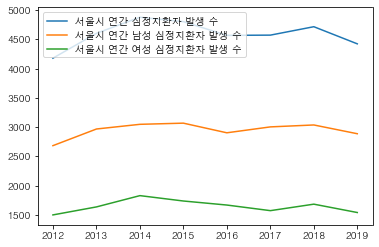

In [126]:
plt.plot(x, y1, label = '서울시 연간 심정지환자 발생 수')
plt.plot(x, y2, label = '서울시 연간 남성 심정지환자 발생 수')
plt.plot(x, y3, label = '서울시 연간 여성 심정지환자 발생 수')
plt.legend()
plt.show()

In [128]:
sper = seoul.T[2::2]
sper

,15,16,17,19,20,21,22,23,24,25,26,27
성별 및 연령별(2),소계,남자,여자,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80세 이상
2012.1,15.0,64.2,35.8,1.3,1.0,3.0,5.6,8.9,17.5,16.8,23.7,22.3
2013.1,15.7,64.4,35.5,1.4,1.3,3.0,5.5,8.6,17.0,16.6,23.4,23.1
2014.1,16.1,62.5,37.4,1.1,1.1,2.4,5.0,8.0,15.7,16.4,24.1,25.9
2015.1,15.6,63.8,36.1,1.2,1.2,2.9,4.7,8.6,15.0,15.9,25.1,25.2
2016.1,15.3,63.5,36.5,1.1,0.8,3.1,4.5,9.1,15.3,16.6,24.8,24.7
2017.1,15.6,65.7,34.3,0.8,0.9,2.9,4.3,8.5,15.4,17.3,24.6,25.3
2018.1,15.4,64.4,35.6,1.0,1.3,2.4,4.0,8.1,14.2,17.4,24.4,27.2
2019.1,14.4,65.2,34.8,1.1,1.1,3.1,3.8,7.0,14.1,17.7,23.9,28.1


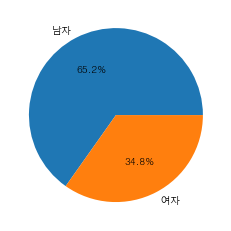

In [141]:
ratio = list(sper.iloc[-1, 1:3].astype(float))
labels = list(sper.iloc[0, 1:3])

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

In [136]:
list(sper.iloc[-1, 3:].astype(float))

[1.1, 1.1, 3.1, 3.8, 7.0, 14.1, 17.7, 23.9, 28.1]

In [139]:
list(sper.iloc[0, 3:])

['0~9세',
 '10~19세',
 '20~29세',
 '30~39세',
 '40~49세',
 '50~59세',
 '60~69세',
 '70~79세',
 '80세 이상']

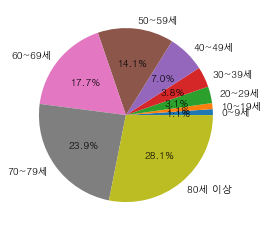

In [140]:
ratio = list(sper.iloc[-1, 3:].astype(float))
labels = list(sper.iloc[0, 3:])

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()